In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pickle
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
!ls

Mounted at /content/drive
/content
drive  sample_data


In [3]:
#from zipfile import ZipFile

In [4]:
#with ZipFile('drive/MyDrive/CatDog/archive.zip','r') as zipObj:
  #zipObj.extractall('drive/MyDrive/CatDog')

In [5]:
!unzip 'drive/MyDrive/CatDog/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [6]:
Dir = r'/content/training_set/training_set'
Category = ['cats' , 'dogs']


In [7]:
from google.colab.patches import cv2_imshow

Extracting Datasets

In [8]:
imageSize = 100
DataSet = []
for categories in Category:
  folder = os.path.join(Dir , categories)
  label = Category.index(categories)
  for images in os.listdir(folder):
    img = os.path.join(folder , images)
    imgArray = cv.imread(img)
    try:
      imgArray = cv.resize(imgArray , (imageSize , imageSize))
    except:
      break
    DataSet.append([imgArray , label])


In [9]:
print(len(DataSet))


7781


In [10]:
import random
random.shuffle(DataSet)

In [11]:
X = []
y = []

for features,labels in DataSet:
  X.append(features)
  y.append(labels)

In [12]:
y = np.array(y)
X = np.array(X)

In [13]:
print(y) 
print(len(y))

[0 0 1 ... 0 0 0]
7781


In [14]:
pickle.dump(X,open('X.pkl','wb'))
pickle.dump(y,open('y.pkl','wb'))

# **Model Training Starts**

In [15]:
Features = pickle.load(open('X.pkl','rb'))
Labels = pickle.load(open('y.pkl','rb'))
Features = Features/255

In [16]:
from keras.layers import Conv2D,MaxPooling2D,Flatten, Dense
from keras.models import Sequential


In [17]:
model = Sequential()

model.add(Conv2D(64 , (3 , 3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3 , 3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3 , 3) , activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128 , input_shape = Features.shape[1:] , activation='relu'))
model.add(Dense(128 , activation='relu'))

model.add(Dense(2 , activation='softmax'))


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [20]:
model.fit(Features,Labels,epochs=5,validation_split=0.2,batch_size = 31)

Epoch 1/5
201/201 [==============================] - 4s 19ms/step - loss: 0.0160 - accuracy: 0.9966 - val_loss: 1.3385 - val_accuracy: 0.7707
Epoch 2/5
201/201 [==============================] - 4s 18ms/step - loss: 0.0198 - accuracy: 0.9928 - val_loss: 1.5666 - val_accuracy: 0.7476
Epoch 3/5
201/201 [==============================] - 4s 18ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 1.4959 - val_accuracy: 0.7463
Epoch 4/5
201/201 [==============================] - 4s 18ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 1.4662 - val_accuracy: 0.7534
Epoch 5/5
201/201 [==============================] - 4s 18ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 1.5667 - val_accuracy: 0.7656


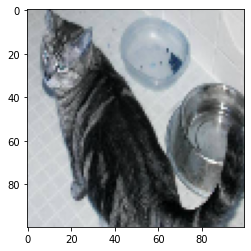

In [21]:
i = 1113
plt.imshow(Features[i])

In [36]:
prediction = model.predict(Features[[i]])
print(f"{prediction}")


[[9.994666e-01 5.334223e-04]]


In [37]:
print(np.sum(prediction))
if(prediction[0,0] > prediction[0,1]):
  print("Its a cat")
else:
  print("Its a dog")

1.0
Its a cat



# **TEST DATA**:

(100, 100, 3)


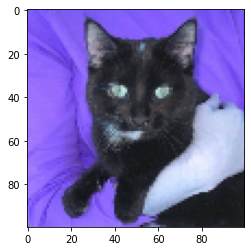

In [67]:
testImage = '/content/test_set/test_set/cats/cat.4515.jpg'
testImage = cv.imread(testImage)
imageSize =  100
try:
  testImage = cv.resize(testImage , (imageSize , imageSize))
  testImage = np.array(testImage)
  testImage.reshape(-1, imageSize, imageSize, 3)

  plt.imshow(testImage)
except:
  print("Unvalid")
testImage = testImage /255
print(testImage.shape)

In [68]:
prediction = model.predict(testImage.reshape(1, 100, 100, 3))
print(f"{prediction}")

[[9.9965513e-01 3.4488412e-04]]


In [69]:
print("Prediction's sum is" , np.sum(prediction))
if(prediction[0,0] > prediction[0,1]):
  print("Its a cat")
else:
  print("Its a dog")

Prediction's sum is 1.0
Its a cat
